# <font color='blue'>Análise Receitas das Cidades de Santos, Cubatão, Guarujá, São Vicente e Praia Grande</font>

In [1]:
#Importação das Bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import locale
# locale.setlocale(locale.LC_ALL, '')

## Importação das bases do TCE

In [2]:
# Carga do DataSet de Santos 
df_santos = pd.read_csv('/media/joao/DATA/TCE/Bases/R_Santos_2018.csv', sep=';')

# Carga do DataSet de Cubatão 
df_cubatao = pd.read_csv('/media/joao/DATA/TCE/Bases/R_Cubatao_2018.csv', sep=';')

# Carga do DataSet de Guarujá
df_guaruja = pd.read_csv('/media/joao/DATA/TCE/Bases/R_Guaruja_2018.csv', sep=';')
    
#Carga do DataSet de São Vicente
df_saovicente = pd.read_csv('/media/joao/DATA/TCE/Bases/R_SaoVicente_2018.csv', sep=';')

#Carga do DataSet de São Vicente
df_praia_grande = pd.read_csv('/media/joao/DATA/TCE/Bases/R_Praia_Grande_2018.csv', sep=';')

## Tratamento dos DataSets

In [3]:
#Padronização de tempo entre as bases - Todas com Segundo Semestre,
#pois santos está somente com segundo semestre. 

df_cubatao = df_cubatao[df_cubatao["mes_referencia"] > 5]
df_guaruja = df_guaruja[df_guaruja["mes_referencia"] > 5]
df_saovicente = df_saovicente[df_saovicente["mes_referencia"] > 5]
df_praia_grande = df_praia_grande[df_praia_grande["mes_referencia"] > 5]

#Consolidação de todos os DataSets  
df_receitas = pd.concat([df_santos, df_cubatao, df_guaruja, df_saovicente, df_praia_grande])

#Número de linhas e Colunas da base final
# df_receitas.shape

# #Remove notação cientifica
pd.set_option('display.float_format', lambda x: '%.2f' % x) 


## Comparação de Receitas entre os municipios

In [4]:
#Comparação de Receitas entre os municipios

#Total de receita pos cidades
df_receitas_plot_bar = pd.DataFrame(df_receitas.groupby('ds_municipio')['vl_arrecadacao'].sum())
df_receitas_plot_bar.sort_values('vl_arrecadacao')

,vl_arrecadacao
ds_municipio,
São Vicente,463023274.77
Cubatão,550015588.15
Guarujá,645326188.92
Praia Grande,679500506.84
Santos,2596683870.14


## Gráfico de Barras de Receitas entre as cidades

<BarContainer object of 5 artists>

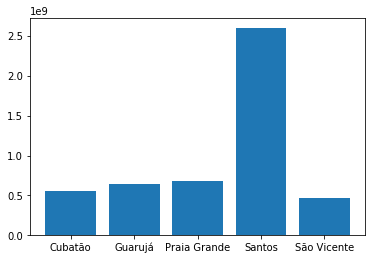

In [27]:
# Gráfico de Barras de Receitas entre as cidades
plt.bar(df_receitas_plot_bar.index.values, df_receitas_plot_bar['vl_arrecadacao'])

## Qual é a maior fonte de recursos dos municipios?.

In [28]:
# Qual é a maior fonte de recursos dos municipios?.

df_recursos = df_receitas.set_index('ds_fonte_recurso')
df_recursos = df_recursos.groupby(level = 'ds_fonte_recurso').sum()
df_recursos['vl_arrecadacao']

ds_fonte_recurso
01 - TESOURO                                                                  3107678691.53
02 - TRANSFERÊNCIAS E CONVÊNIOS ESTADUAIS-VINCULADOS                           551488901.42
03 - RECURSOS PRÓPRIOS DE FUNDOS ESPECIAIS DE DESPESA-VINCULADOS               162890798.36
04 - RECURSOS PRÓPRIOS DA ADMINISTRAÇÃO INDIRETA                               650689839.34
05 - TRANSFERÊNCIAS E CONVÊNIOS FEDERAIS-VINCULADOS                            408085265.46
06 - OUTRAS FONTES DE RECURSOS                                                   7687220.01
07 - OPERAÇÕES DE CRÉDITO                                                       30529004.43
12 - TRANSFERÊNCIAS E CONVÊNIOS FEDERAIS-VINCULADOS - EXERCICIOS ANTERIORES     15499708.27
Name: vl_arrecadacao, dtype: float64

## Receitas das cidades por recurso

In [29]:
# Receitas das cidades por recurso

df_recursos_municipio = df_receitas.set_index(['ds_fonte_recurso', 'ds_municipio'])
df_recursos_municipio = df_recursos_municipio.groupby(level = ['ds_fonte_recurso', 'ds_municipio']) 
df_recursos_municipio['vl_arrecadacao'].sum() 

ds_fonte_recurso                                                             ds_municipio
01 - TESOURO                                                                 Cubatão         339121862.55
                                                                             Guarujá         439261048.35
                                                                             Praia Grande    408281702.56
                                                                             Santos         1681888938.16
                                                                             São Vicente     239125139.91
02 - TRANSFERÊNCIAS E CONVÊNIOS ESTADUAIS-VINCULADOS                         Cubatão          38402937.67
                                                                             Guarujá          69044364.49
                                                                             Praia Grande    129750296.32
                                                              

## Evolução das Receitas, por mês nas cidades da Região

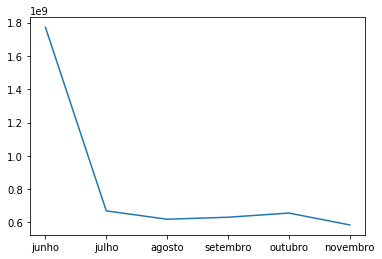

In [30]:
# Evolução das Receitas, por mês nas cidades da Região
df_receitas_mensal = df_receitas
df_receitas_mensal.dtypes

df_receitas_mensal = df_receitas_mensal.set_index(['mes_referencia', 'mes_ref_extenso'])

df_receitas_mensal = df_receitas_mensal.groupby(level = ['mes_referencia','mes_ref_extenso'])
df_receitas_mensal.sum()
df_receitas_mensal_plot = pd.DataFrame(df_receitas_mensal['vl_arrecadacao'].sum())
df_receitas_mensal_plot = df_receitas_mensal_plot.reset_index()
plt.plot(df_receitas_mensal_plot.mes_ref_extenso,df_receitas_mensal_plot['vl_arrecadacao'])

## Cidades que apresentaram receitas com Royalties da Exploração do Petróleo e Gás Natural

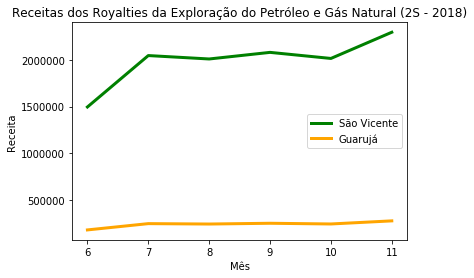

In [6]:
# Cidades que apresentaram receitas com Royalties da Exmploração do Petróleo e Gás Natural

#Subset dos Royalties
df_petroleo = df_receitas[df_receitas["ds_cd_aplicacao_fixo"] == '140 - ROYALTIES DA EXPLORAÇÃO DO PETRÓLEO E GÁS NATURAL']


#Indice por cidade e mês
df_petroleo_cidades = df_petroleo.set_index(['ds_municipio', 'mes_referencia'])
df_petroleo_cidades = df_petroleo_cidades.groupby(level = ['ds_municipio', 'mes_referencia'])['vl_arrecadacao'].sum()

df_plot_petroleo = pd.DataFrame(df_petroleo_cidades)  #Converte para Data Frame
df_plot_petroleo = df_plot_petroleo.reset_index()     #Reset Index

#Divisão do subset por cidade, para plotar no gráfico 
df_plot_petroleo_guaruja = df_plot_petroleo[df_plot_petroleo['ds_municipio'] == "Guarujá"]
df_plot_petroleo_guaruja 

df_plot_petroleo_saovicente = df_plot_petroleo[df_plot_petroleo['ds_municipio'] == "São Vicente"]
df_plot_petroleo_saovicente


plt.plot(df_plot_petroleo_saovicente['mes_referencia'],df_plot_petroleo_saovicente['vl_arrecadacao'], color='g', label = "São Vicente",linewidth=3.0)
plt.plot(df_plot_petroleo_guaruja['mes_referencia'],df_plot_petroleo_guaruja['vl_arrecadacao'], color='orange', label = "Guarujá", linewidth=3.0)
plt.xlabel('Mês')
plt.ylabel('Receita')
plt.title('Receitas dos Royalties da Exploração do Petróleo e Gás Natural (2S - 2018)')
plt.legend()
plt.show()


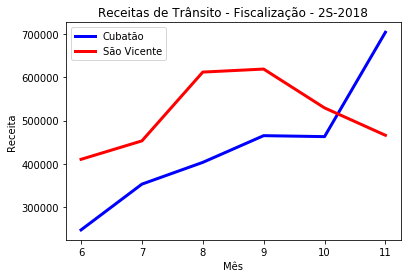

In [5]:
df_multas = df_receitas[df_receitas["ds_cd_aplicacao_fixo"] == '450 - TRÂNSITO - FISCALIZAÇÃO']
# df_cidades = df_cidades.groupby(['ds_municipio', 'ds_orgao', 'mes_referencia'])
df_multas = df_multas.groupby(['ds_municipio', 'mes_referencia'])
df_multas = pd.DataFrame(df_multas['vl_arrecadacao'].sum())
df_multas = df_multas.reset_index()


df_multas_cubatao = df_multas[df_multas['ds_municipio'] == 'Cubatão']
df_multas_saovicente = df_multas[df_multas['ds_municipio'] == 'São Vicente']


plt.plot(df_multas_cubatao['mes_referencia'],df_multas_cubatao['vl_arrecadacao'], color='Blue', label='Cubatão', linewidth=3.0)
plt.plot(df_multas_saovicente['mes_referencia'],df_multas_saovicente['vl_arrecadacao'], color='red', label = "São Vicente", linewidth=3.0)
plt.xlabel('Mês')
plt.ylabel('Receita')
plt.title('Receitas de Trânsito - Fiscalização - 2S-2018')
plt.legend()
plt.show()


In [52]:
#Transforma os valores de para moeda e um data set'
# df_cubatao['($) millions'] = ['${:,.2f}MM'.format(x) for x in df_cubatao['vl_arrecadacao']/1000000]

# Formata a para o formato de moeda local.
# vl_santos = locale.currency(myInput, symbol=False, grouping=True)
# vl_santos